## Data Extraction using PyGithub API

In [11]:
from github import Github

access_token = 'faeb0c6594b27ac8b8e6265fd7bda0e23ebdeb51'
github = Github(access_token, per_page=100)
stargazers = [ s for s in github.get_user('ptwobrussell').get_repo('Mining-the-Social-Web').get_stargazers() ]
print("Number of stargazers", len(stargazers))

Number of stargazers 1175


## Network Creation using Networkx and Stargazer Data

In [12]:
import networkx as nx

starting_user = github.get_user('ptwobrussell')
starting_repo = starting_user.get_repo('Mining-the-Social-Web')

g = nx.DiGraph()
g.add_node(starting_repo.name + '(repo)', type='repo', lang=starting_repo.language, owner=starting_user.login)

for sg in stargazers:
    g.add_node(sg.login + '(user)', type='user')
    g.add_edge(sg.login + '(user)', starting_repo.name + '(repo)', type='gazes')

## Displaying Network Information - Nodes and Edges

In [13]:
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1176
Number of edges: 1175
Average in degree:   0.9991
Average out degree:   0.9991


In [7]:
print(g.node['Mining-the-Social-Web(repo)'])

{'type': 'repo', 'lang': 'JavaScript', 'owner': 'ptwobrussell'}


In [8]:
print(g.node['ptwobrussell(user)'])

{'type': 'user'}


In [9]:
print(g['ptwobrussell(user)']['Mining-the-Social-Web(repo)'])

{'type': 'gazes'}


In [10]:
print(g['ptwobrussell(user)'])
print(g['Mining-the-Social-Web(repo)'])

{'Mining-the-Social-Web(repo)': {'type': 'gazes'}}
{}


In [14]:
print(g.in_edges(['ptwobrussell(user)']))
print(g.out_edges(['ptwobrussell(user)']))

[]
[('ptwobrussell(user)', 'Mining-the-Social-Web(repo)')]


In [13]:
print(g.in_edges(['Mining-the-Social-Web(repo)']))
print(g.out_edges(['Mining-the-Social-Web(repo)']))

[('rdempsey(user)', 'Mining-the-Social-Web(repo)'), ('frac(user)', 'Mining-the-Social-Web(repo)'), ('prb(user)', 'Mining-the-Social-Web(repo)'), ('mcroydon(user)', 'Mining-the-Social-Web(repo)'), ('batasrki(user)', 'Mining-the-Social-Web(repo)'), ('twleung(user)', 'Mining-the-Social-Web(repo)'), ('kevinchiu(user)', 'Mining-the-Social-Web(repo)'), ('nikolay(user)', 'Mining-the-Social-Web(repo)'), ('tswicegood(user)', 'Mining-the-Social-Web(repo)'), ('ngpestelos(user)', 'Mining-the-Social-Web(repo)'), ('darron(user)', 'Mining-the-Social-Web(repo)'), ('brunojm(user)', 'Mining-the-Social-Web(repo)'), ('rgaidot(user)', 'Mining-the-Social-Web(repo)'), ('openweb(user)', 'Mining-the-Social-Web(repo)'), ('shanlalit(user)', 'Mining-the-Social-Web(repo)'), ('hoffmann(user)', 'Mining-the-Social-Web(repo)'), ('nacht(user)', 'Mining-the-Social-Web(repo)'), ('hectoregm(user)', 'Mining-the-Social-Web(repo)'), ('tzuryby(user)', 'Mining-the-Social-Web(repo)'), ('marksands(user)', 'Mining-the-Social-Web(

## Plotting Network consisiting of Repo + Stargazers

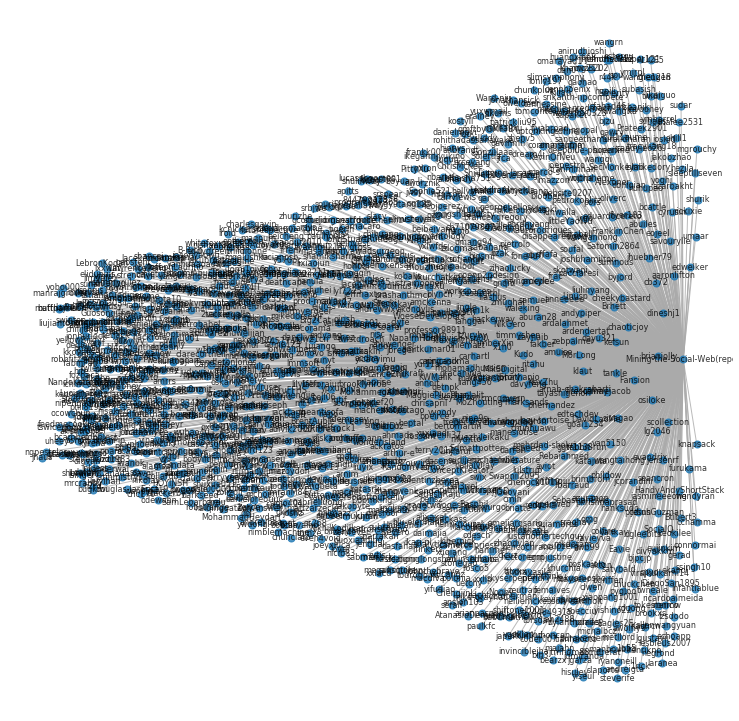

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)
labels = dict([(n, n.split('(user)')[0]) for n in g.nodes()])
nx.draw(g, pos=nx.spring_layout(g), arrows=False, ax=ax, node_size=50,edge_color='#aaaaaa',alpha=0.8, labels=labels, font_size=8)

In [17]:
d = json_graph.node_link_data(g)
json.dump(d, open('graphs/interest_graph.json', 'w'))

f = open('graphs/interest_graph.json', 'r')
x = f.readline()
f.close()

f = open('graphs/interest_graph.json', 'w')
f.write("jsonCallback(" + str(x) + ");")
f.close()

print("http://0.0.0.0:8000/graphs/interest_graph.html")

viz_file = 'graphs/interest_graph.html'
display(IFrame(viz_file, '100%', '500px'))

http://0.0.0.0:8000/graphs/interest_graph.html


## Adding Follow Edges between the Stargazer Users

In [29]:
for _, stargazer in enumerate(stargazers):
    
    try:
        for follower in stargazer.get_followers()[:20]:
            if follower.login + '(user)' in g:
                g.add_edge(follower.login + '(user)', stargazer.login + '(user)', type='follows')
                print("Added edge from {0} to {1}".format(follower.login,stargazer.login))
    
    except Exception as e:continue

Added edge from douglas to frac
Added edge from empjustine to frac
Added edge from tswicegood to mcroydon
Added edge from edwelker to mcroydon
Added edge from angusshire to kevinchiu
Added edge from ticean to nikolay
Added edge from mcroydon to tswicegood
Added edge from douglas to brunojm
Added edge from trietptm to brunojm
Added edge from CaptSolo to rgaidot
Added edge from FGRibreau to rgaidot
Added edge from kenneth-reitz to hoffmann
Added edge from darkseed to hoffmann
Added edge from angusshire to nacht
Added edge from natorro to hectoregm
Added edge from stonegao to wbzyl
Added edge from angusshire to sou
Added edge from angusshire to magnum
Added edge from matiskay to suzuki
Added edge from angusshire to tertsch
Added edge from angusshire to ymirpl
Added edge from milmazz to sebasmagri
Added edge from angusshire to paulbersch
Added edge from angusshire to georgebellos
Added edge from rohithadassanayake to georgebellos
Added edge from VagrantStory to acadopia
Added edge from ang

Added edge from Xeoncross to alixaxel
Added edge from yifudiao to whitefoxx
Added edge from angusshire to whitefoxx
Added edge from angusshire to hertzel
Added edge from angusshire to patrickclancy
Added edge from albertsun to sjwilliams
Added edge from aboutaaron to sjwilliams
Added edge from angusshire to javouhey
Added edge from VagrantStory to javouhey
Added edge from angusshire to theresia
Added edge from VagrantStory to theresia
Added edge from andrewwxy to theresia
Added edge from angusshire to semantium
Added edge from angusshire to amanahuja
Added edge from angusshire to w1mvy
Added edge from angusshire to adivik2000
Added edge from macdiva to albertsun
Added edge from mikedory to albertsun
Added edge from angusshire to rbarraud
Added edge from angusshire to kyrcha
Added edge from peicheng to taoyu
Added edge from jasonyaw to taoyu
Added edge from frac to douglas
Added edge from brunojm to douglas
Added edge from rohithadassanayake to douglas
Added edge from odewahn to mikelou

Added edge from gawbul to carlplant
Added edge from angusshire to ykxpb
Added edge from hezila to tokestermw
Added edge from angusshire to lsevero
Added edge from angusshire to WoeseDevelopers
Added edge from redswallow to hupili
Added edge from daimajia to hupili
Added edge from angusshire to Thawab
Added edge from VagrantStory to Thawab
Added edge from VagrantStory to ironico
Added edge from angusshire to rickixie
Added edge from angusshire to defcyy
Added edge from angusshire to h2rd
Added edge from briatte to mduering
Added edge from angusshire to sakares
Added edge from angusshire to joeywen
Added edge from angusshire to temberature
Added edge from angusshire to brycepj
Added edge from VagrantStory to brycepj
Added edge from angusshire to callard
Added edge from angusshire to sc268
Added edge from angusshire to coodoing
Added edge from isnowfy to yeeyou
Added edge from angusshire to Geek4IT
Added edge from andrewwxy to Geek4IT
Added edge from angusshire to skyserpent
Added edge fr

## Saving Network Graph to Pickle File

In [32]:
nx.write_gpickle(g, "data/github.p")

## Loading Network Graph Data from Pickle File

In [2]:
import networkx as nx
g = nx.read_gpickle("data/github.p")

## Displaying Network's New Connection Information

In [3]:
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1176
Number of edges: 1761
Average in degree:   1.4974
Average out degree:   1.4974


In [4]:
print("Number of follow edges : ",len([e for e in g.edges(data=True) if e[2]['type'] == 'follows']))
print("Number of gaze edges   : ",len([e for e in g.edges(data=True) if e[2]['type'] == 'gazes']))

Number of follow edges :  586
Number of gaze edges   :  1175


## Top 10 Connected Github Nodes

In [5]:
from operator import itemgetter

print("The top 10 connected nodes with their adjacent links count : ",'\n')
for node, links in sorted([n for n in g.degree()], key=itemgetter(1), reverse=True)[:10]:
    print(node.ljust(30," "), links)

The top 10 connected nodes with their adjacent links count :  

Mining-the-Social-Web(repo)    1175
angusshire(user)               298
VagrantStory(user)             34
rohithadassanayake(user)       30
trietptm(user)                 25
JT5D(user)                     13
ptwobrussell(user)             11
gr33ndata(user)                8
douglas(user)                  8
mcroydon(user)                 7


In [6]:
print("The incoming and outgoing edges of a user in the top 10 : ",'\n')
print("Number of incoming edges : ",len(g.in_edges('douglas(user)')))
print("Number of outgoing edges : ",len(g.out_edges('douglas(user)')))

The incoming and outgoing edges of a user in the top 10 :  

Number of incoming edges :  3
Number of outgoing edges :  5


## Top 10 Popular Users - Most Followed

In [7]:
from collections import Counter

temp = Counter([e[1] for e in g.edges(data=True) if e[2]['type'] == 'follows'])
popular_users = [(i,j) for (i,j) in temp.most_common() if j > 1][:10]

print("Top 10 popular users : ",'\n')
for node in popular_users:
    print(node[0])

Top 10 popular users :  

ptwobrussell(user)
japerk(user)
douglas(user)
Kilian(user)
napo(user)
kencochrane(user)
mlaprise(user)
sanpingz(user)
gr33ndata(user)
anirudhjoshi(user)


## Centrality Measures of the Network Graph

In [8]:
from operator import itemgetter

h = g.copy()
h.remove_node('Mining-the-Social-Web(repo)')

dc = sorted(nx.degree_centrality(h).items(), key=itemgetter(1), reverse=True)
print("Degree Centrality".center(50,' '),'\n')
for node, degree in dc[:10]:
    print(node.ljust(30," "),degree)


bc = sorted(nx.betweenness_centrality(h).items(), key=itemgetter(1), reverse=True)
print('\n',"Betweenness Centrality".center(50,' '),'\n')
for node, degree in bc[:10]:
    print(node.ljust(30," "),degree)

print('\n',"Closeness Centrality".center(50,' '),'\n')
cc = sorted(nx.closeness_centrality(h).items(), key=itemgetter(1), reverse=True)
for node, degree in cc[:10]:
    print(node.ljust(30," "),degree)

                Degree Centrality                  

angusshire(user)               0.2529812606473595
VagrantStory(user)             0.028109028960817718
rohithadassanayake(user)       0.024701873935264056
trietptm(user)                 0.020442930153321978
JT5D(user)                     0.010221465076660989
ptwobrussell(user)             0.008517887563884156
gr33ndata(user)                0.00596252129471891
douglas(user)                  0.00596252129471891
mcroydon(user)                 0.0051107325383304945
peicheng(user)                 0.0051107325383304945

               Betweenness Centrality               

rohithadassanayake(user)       0.00013651857306139995
douglas(user)                  0.00012671537765539517
brunojm(user)                  4.937905834135743e-05
trietptm(user)                 4.647440785068935e-05
frac(user)                     2.75941796613468e-05
Doppp(user)                    1.37970898306734e-05
gr33ndata(user)                1.0892439340005316e-05
lr

## Comparison of Network Graphs Stats - After Adding Follow Edges

In [9]:
print("Stats of the graph with the starting repository : ")
print(nx.info(g))
print()


print("Stats of the extracted subgraph with only users : ")
print(nx.info(h))
print()

Stats of the graph with the starting repository : 
Name: 
Type: DiGraph
Number of nodes: 1176
Number of edges: 1761
Average in degree:   1.4974
Average out degree:   1.4974

Stats of the extracted subgraph with only users : 
Name: 
Type: DiGraph
Number of nodes: 1175
Number of edges: 586
Average in degree:   0.4987
Average out degree:   0.4987



## Plotting the Forest Direct Graph for the Interest Graph

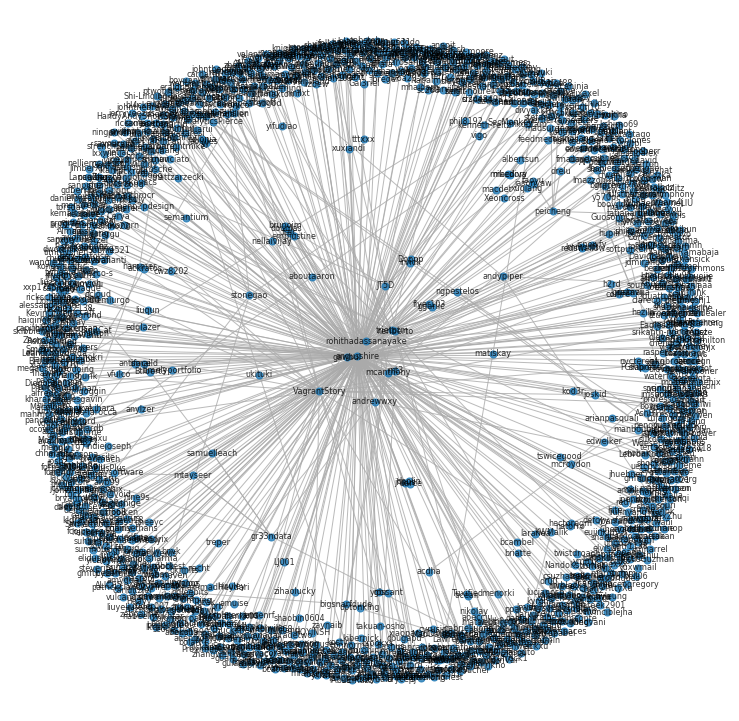

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)
labels = dict([(n, n.split('(user)')[0]) for n in h.nodes()])
nx.draw(h, pos=nx.spring_layout(h), arrows=False, ax=ax, node_size=50,edge_color='#aaaaaa',alpha=0.8, labels=labels, font_size=8)

In [12]:
import os
import json
from IPython.display import IFrame
from IPython.core.display import display
from networkx.readwrite import json_graph

d = json_graph.node_link_data(h)
json.dump(d, open('graphs/interest_graph.json', 'w'))

f = open('graphs/interest_graph.json', 'r')
x = f.readline()
f.close()

f = open('graphs/interest_graph.json', 'w')
f.write("jsonCallback(" + str(x) + ");")
f.close()

print("http://0.0.0.0:8000/graphs/interest_graph.html")

viz_file = 'graphs/interest_graph.html'
display(IFrame(viz_file, '100%', '500px'))

http://0.0.0.0:8000/graphs/interest_graph.html


## Extracting Subgraph of the User with the Highest Degree Centrality - All Connections

In [24]:
G = h.edge_subgraph(h.edges(dc[0][0])).copy() 

## Plotting the Subgraph

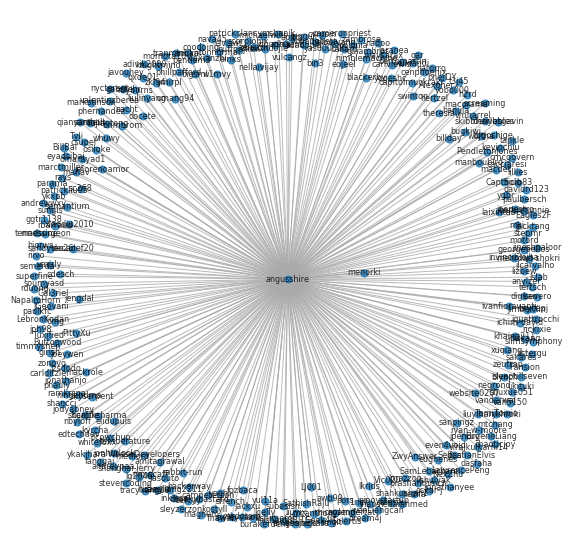

In [196]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
labels = dict([(n, n.split('(user)')[0]) for n in G.nodes()])
nx.draw(G, pos=nx.spring_layout(G), arrows=False, ax=ax, node_size=50,edge_color='#aaaaaa',alpha=0.8, labels=labels, font_size=8)

In [25]:
import os
import json
from IPython.display import IFrame
from IPython.core.display import display
from networkx.readwrite import json_graph

d = json_graph.node_link_data(G)
json.dump(d, open('graphs/interest_graph.json', 'w'))

f = open('graphs/interest_graph.json', 'r')
x = f.readline()
f.close()

f = open('graphs/interest_graph.json', 'w')
f.write("jsonCallback(" + str(x) + ");")
f.close()

print("http://0.0.0.0:8000/graphs/interest_graph.html")

viz_file = 'graphs/interest_graph.html'
display(IFrame(viz_file, '100%', '500px'))

http://0.0.0.0:8000/graphs/interest_graph.html


## Getting the List of the Users in the Subgraph

In [212]:
users = sorted([node.replace('(user)','') for node in G.nodes()])[:100]
users

['1rick',
 'Alexoner',
 'BillBai',
 'Buttonwood',
 'CaptSolo',
 'Eagles2F',
 'EugeneLiang',
 'Fansion',
 'Gal3riel',
 'Geek4IT',
 'JGeovani',
 'JimberXin',
 'LJ001',
 'LawrencePeng',
 'LebronKodan',
 'NapalmHorn',
 'NexZhu',
 'PendletonJones',
 'PittyXu',
 'Rebaiahmed',
 'SamLebarbare',
 'SathishRaju',
 'SebastianElvis',
 'Solertis',
 'Thawab',
 'TomiToivio',
 'Tuxified',
 'Tvli',
 'Vic020',
 'WoeseDevelopers',
 'ZwyAnswer',
 'acadopia',
 'adivik2000',
 'adriaant',
 'amanahuja',
 'amitagrawal',
 'andrewwxy',
 'andreypaa',
 'angusshire',
 'anylzer',
 'apitts',
 'ardendertat',
 'astergu',
 'awb99',
 'barbietunnie',
 'bcattle',
 'beibeiyang',
 'bertomartin',
 'bigsml',
 'billday',
 'bin3',
 'blackerby',
 'blynch',
 'bnerDY',
 'brimbrom',
 'brycepj',
 'buffpojken',
 'bugkiwi',
 'burakerdem',
 'cacciaresi',
 'callard',
 'cameronpriest',
 'campeterson',
 'capitolmuckrakr',
 'carlditzler',
 'carlvlewis',
 'cdesch',
 'cenphoenix',
 'chaoticjoy',
 'charlesgavin',
 'cheekybastard',
 'cmcgovern',

## Creating the Github Profile Document for Each User in the Subgraph

In [213]:
corpus = {}

for user in users:
    doc = ""
    for repo in github.get_user(user).get_repos():
        doc += " ".join(str(x) for x in [repo.name,repo.description,repo.language,''])\
        .replace('-',' ').replace('_',' ')
    corpus[user] = doc
    print(users.index(user),user,'\n',doc[:50],'....')

0 1rick 
 1rick pelican output None HTML AppsList None HTML  ....
1 Alexoner 
 AI cheat sheet cheat sheet for Artificial Intellig ....
2 BillBai 
 BBTNewsClient iOS Client for BBT News Kit Objectiv ....
3 Buttonwood 
 alchemydatabase Automatically exported from code.g ....
4 CaptSolo 
 LU pysem LU Python Seminar  Jupyter Notebook micro ....
5 Eagles2F 
 2FanCoreCSStudy This is the practice repo for the  ....
6 EugeneLiang 
 12devsNodeJsDraw Real time drawing with Nodejs, So ....
7 Fansion 
 awesome awesomeness A curated list of awesome awes ....
8 Gal3riel 
 ChezScheme Chez Scheme  Scheme gal3riel.github.io  ....
9 Geek4IT 
 AElf A scalable blockchain built on clusters C# Al ....
10 JGeovani 
 adblockplusandroid Adblock Plus app for Android Ja ....
11 JimberXin 
 alphaFM Multi thread implementation of Factorizati ....
12 LJ001 
 android serialport api Automatically exported from ....
13 LawrencePeng 
 awesome courses :books: List of awesome university ....
14 LebronKodan 
 2048 AI A si

## Computing the Cosine Similarity of the Users in the Subgraph using TF-IDF

In [227]:
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer


stemmer = nltk.stem.porter.PorterStemmer()
def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')
def cosine_sim(text1, text2):
    if len(text1) == 0 or len(text2) == 0:
        return 0
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]


## Constructing the Similarity Matrix

In [250]:
similarity_matrix = []
for i in range(len(users)):similarity_matrix.append([0]*len(users))

temp = 0
for i in range(len(users)):
    for j in range(i+1,len(users)):
        temp += 1
        similarity_matrix[i][j] = similarity_matrix[j][i] = cosine_sim(corpus[users[i]],corpus[users[j]])
        print(temp,"Similarity between {0} and {1} is {2}".format(users[i],users[j],similarity_matrix[i][j]))

1 Similarity between 1rick and Alexoner is 0.12948289765328194
2 Similarity between 1rick and BillBai is 0.08684604905909704
3 Similarity between 1rick and Buttonwood is 0.17692958309717158
4 Similarity between 1rick and CaptSolo is 0.12218749724536809
5 Similarity between 1rick and Eagles2F is 0.08982356064758801
6 Similarity between 1rick and EugeneLiang is 0.1509649989081321
7 Similarity between 1rick and Fansion is 0.14893613451575025
8 Similarity between 1rick and Gal3riel is 0.039389229958367335
9 Similarity between 1rick and Geek4IT is 0.0920376516587576
10 Similarity between 1rick and JGeovani is 0.03676290380706393
11 Similarity between 1rick and JimberXin is 0.09934262801653532
12 Similarity between 1rick and LJ001 is 0.03441716546522382
13 Similarity between 1rick and LawrencePeng is 0.057046045466907495
14 Similarity between 1rick and LebronKodan is 0.11610153142144262
15 Similarity between 1rick and NapalmHorn is 0.11246144805364952
16 Similarity between 1rick and NexZhu i

137 Similarity between Alexoner and anylzer is 0.22662930492989017
138 Similarity between Alexoner and apitts is 0.16724071531558554
139 Similarity between Alexoner and ardendertat is 0.2539305752818846
140 Similarity between Alexoner and astergu is 0.31011269352718784
141 Similarity between Alexoner and awb99 is 0.36500949137967537
142 Similarity between Alexoner and barbietunnie is 0.29477304288827394
143 Similarity between Alexoner and bcattle is 0.29627615311257266
144 Similarity between Alexoner and beibeiyang is 0.22772009859442183
145 Similarity between Alexoner and bertomartin is 0.3930452641937509
146 Similarity between Alexoner and bigsml is 0.10509391631819753
147 Similarity between Alexoner and billday is 0.11520035130085977
148 Similarity between Alexoner and bin3 is 0.39027658026696155
149 Similarity between Alexoner and blackerby is 0.10331005429742532
150 Similarity between Alexoner and blynch is 0.16383332226786496
151 Similarity between Alexoner and bnerDY is 0.262671

270 Similarity between BillBai and cyrusin is 0.20333021527696649
271 Similarity between BillBai and daevid is 0.3962886010830317
272 Similarity between BillBai and dasfaha is 0.17613128654244314
273 Similarity between BillBai and davidrd123 is 0.09450041919382947
274 Similarity between BillBai and decadef20 is 0.188942043249697
275 Similarity between BillBai and defcyy is 0.09745686497464605
276 Similarity between BillBai and digvan is 0.39263642844329993
277 Similarity between BillBai and diskang is 0.17401754660240523
278 Similarity between BillBai and docete is 0.053871993652161505
279 Similarity between BillBai and dream4j is 0.06610262945327687
280 Similarity between BillBai and edtechdev is 0
281 Similarity between BillBai and eiriks is 0.16955966811377735
282 Similarity between BillBai and elidupuis is 0.2829991608875072
283 Similarity between BillBai and elviswf is 0.1731949513729612
284 Similarity between BillBai and eojeel is 0.09330773924655042
285 Similarity between BillBa

405 Similarity between CaptSolo and Rebaiahmed is 0.14350271070344356
406 Similarity between CaptSolo and SamLebarbare is 0.08828474095567015
407 Similarity between CaptSolo and SathishRaju is 0.041631106641538046
408 Similarity between CaptSolo and SebastianElvis is 0.14218481955387272
409 Similarity between CaptSolo and Solertis is 0.36213192615315837
410 Similarity between CaptSolo and Thawab is 0.030082206606735957
411 Similarity between CaptSolo and TomiToivio is 0.07814583992016878
412 Similarity between CaptSolo and Tuxified is 0.02971628469480859
413 Similarity between CaptSolo and Tvli is 0.0572130526364444
414 Similarity between CaptSolo and Vic020 is 0.37869529811309927
415 Similarity between CaptSolo and WoeseDevelopers is 0.0
416 Similarity between CaptSolo and ZwyAnswer is 0.00588595892922983
417 Similarity between CaptSolo and acadopia is 0.0
418 Similarity between CaptSolo and adivik2000 is 0.0883948369622957
419 Similarity between CaptSolo and adriaant is 0.16680716870

527 Similarity between Eagles2F and bertomartin is 0.34195294796398
528 Similarity between Eagles2F and bigsml is 0.3966043814121468
529 Similarity between Eagles2F and billday is 0.1457034333046804
530 Similarity between Eagles2F and bin3 is 0.309186134903527
531 Similarity between Eagles2F and blackerby is 0.11358940180989248
532 Similarity between Eagles2F and blynch is 0.1909598776227883
533 Similarity between Eagles2F and bnerDY is 0.2637734021130139
534 Similarity between Eagles2F and brimbrom is 0.19878737764894264
535 Similarity between Eagles2F and brycepj is 0.09298802917135746
536 Similarity between Eagles2F and buffpojken is 0.12340134087927382
537 Similarity between Eagles2F and bugkiwi is 0.2745895241849179
538 Similarity between Eagles2F and burakerdem is 0
539 Similarity between Eagles2F and cacciaresi is 0.03767836074994427
540 Similarity between Eagles2F and callard is 0.10266159092398949
541 Similarity between Eagles2F and cameronpriest is 0.10942124782191867
542 Sim

647 Similarity between EugeneLiang and csuper is 0.06280267779897224
648 Similarity between EugeneLiang and cyrusin is 0.22609067135626695
649 Similarity between EugeneLiang and daevid is 0.6405819368185272
650 Similarity between EugeneLiang and dasfaha is 0.25191725918044555
651 Similarity between EugeneLiang and davidrd123 is 0.2012600460034283
652 Similarity between EugeneLiang and decadef20 is 0.27775631510994125
653 Similarity between EugeneLiang and defcyy is 0.15202268612422898
654 Similarity between EugeneLiang and digvan is 0.4874141109811007
655 Similarity between EugeneLiang and diskang is 0.21510534502901815
656 Similarity between EugeneLiang and docete is 0.058822978748547736
657 Similarity between EugeneLiang and dream4j is 0.16095822840272075
658 Similarity between EugeneLiang and edtechdev is 0
659 Similarity between EugeneLiang and eiriks is 0.273065807328758
660 Similarity between EugeneLiang and elidupuis is 0.4832618632538902
661 Similarity between EugeneLiang and e

776 Similarity between Gal3riel and SamLebarbare is 0.05309256054239723
777 Similarity between Gal3riel and SathishRaju is 0.008529853073923071
778 Similarity between Gal3riel and SebastianElvis is 0.06247050119388805
779 Similarity between Gal3riel and Solertis is 0.13083023716179493
780 Similarity between Gal3riel and Thawab is 0.0052214492275373435
781 Similarity between Gal3riel and TomiToivio is 0.0196561198888294
782 Similarity between Gal3riel and Tuxified is 0.03323046096877418
783 Similarity between Gal3riel and Tvli is 0.02652865793102111
784 Similarity between Gal3riel and Vic020 is 0.02350405030402098
785 Similarity between Gal3riel and WoeseDevelopers is 0.0
786 Similarity between Gal3riel and ZwyAnswer is 0.0
787 Similarity between Gal3riel and acadopia is 0.0
788 Similarity between Gal3riel and adivik2000 is 0.03865492000365614
789 Similarity between Gal3riel and adriaant is 0.21543818342801344
790 Similarity between Gal3riel and amanahuja is 0.0209741654959557
791 Simil

911 Similarity between Geek4IT and carlvlewis is 0.15267274370060152
912 Similarity between Geek4IT and cdesch is 0.13544488272852098
913 Similarity between Geek4IT and cenphoenix is 0.1928632501975671
914 Similarity between Geek4IT and chaoticjoy is 0.10429866672775136
915 Similarity between Geek4IT and charlesgavin is 0.0811673894184519
916 Similarity between Geek4IT and cheekybastard is 0.16758044988662577
917 Similarity between Geek4IT and cmcgovern is 0.03518387619704883
918 Similarity between Geek4IT and connormai is 0.07199174589109726
919 Similarity between Geek4IT and coodoing is 0.2553800363976919
920 Similarity between Geek4IT and csuper is 0.06407168328449846
921 Similarity between Geek4IT and cyrusin is 0.255427521907446
922 Similarity between Geek4IT and daevid is 0.15174483030192554
923 Similarity between Geek4IT and dasfaha is 0.1394260665897208
924 Similarity between Geek4IT and davidrd123 is 0.07298568117256415
925 Similarity between Geek4IT and decadef20 is 0.0246464

1043 Similarity between JimberXin and SamLebarbare is 0.06630717342978792
1044 Similarity between JimberXin and SathishRaju is 0.01540144008710432
1045 Similarity between JimberXin and SebastianElvis is 0.20548461502772378
1046 Similarity between JimberXin and Solertis is 0.5062809538307308
1047 Similarity between JimberXin and Thawab is 0.023971591387377592
1048 Similarity between JimberXin and TomiToivio is 0.05445788855988996
1049 Similarity between JimberXin and Tuxified is 0.060590614290490716
1050 Similarity between JimberXin and Tvli is 0.10815217705157597
1051 Similarity between JimberXin and Vic020 is 0.34768272328418093
1052 Similarity between JimberXin and WoeseDevelopers is 0.0
1053 Similarity between JimberXin and ZwyAnswer is 0.06726228953533868
1054 Similarity between JimberXin and acadopia is 0.0
1055 Similarity between JimberXin and adivik2000 is 0.07735425802407728
1056 Similarity between JimberXin and adriaant is 0.2973457926891782
1057 Similarity between JimberXin a

1166 Similarity between LJ001 and buffpojken is 0.14270581360755835
1167 Similarity between LJ001 and bugkiwi is 0.12335433002125536
1168 Similarity between LJ001 and burakerdem is 0
1169 Similarity between LJ001 and cacciaresi is 0.04006206865852937
1170 Similarity between LJ001 and callard is 0.09359222809142874
1171 Similarity between LJ001 and cameronpriest is 0.08747857466948135
1172 Similarity between LJ001 and campeterson is 0.06102628013351549
1173 Similarity between LJ001 and capitolmuckrakr is 0.09893087223993907
1174 Similarity between LJ001 and carlditzler is 0.02801271122645852
1175 Similarity between LJ001 and carlvlewis is 0.13834421803407485
1176 Similarity between LJ001 and cdesch is 0.33747103381252236
1177 Similarity between LJ001 and cenphoenix is 0.2165229770812571
1178 Similarity between LJ001 and chaoticjoy is 0.09565343609035688
1179 Similarity between LJ001 and charlesgavin is 0.07126057616750979
1180 Similarity between LJ001 and cheekybastard is 0.174538321233

1284 Similarity between LawrencePeng and elviswf is 0.18636815311629706
1285 Similarity between LawrencePeng and eojeel is 0.07330761118442482
1286 Similarity between LawrencePeng and eughenes is 0
1287 Similarity between LawrencePeng and even4void is 0.022646508714887475
1288 Similarity between LawrencePeng and eyadsibai is 0.11290914631008785
1289 Similarity between LawrencePeng and fanggai is 0.014809250556819321
1290 Similarity between LawrencePeng and fasouto is 0.12159636289185259
1291 Similarity between LawrencePeng and fozbaca is 0.0754024015292573
1292 Similarity between LawrencePeng and gabstehr is 0.14852796963189263
1293 Similarity between LawrencePeng and gar is 0.14360086427880128
1294 Similarity between LawrencePeng and geojackass is 0.14598452569011786
1295 Similarity between LawrencePeng and georgebellos is 0.05800005853254724
1296 Similarity between LebronKodan and NapalmHorn is 0.11927523125874702
1297 Similarity between LebronKodan and NexZhu is 0.23833146948284983


1410 Similarity between NapalmHorn and bcattle is 0.21904935617256194
1411 Similarity between NapalmHorn and beibeiyang is 0.22521742635595618
1412 Similarity between NapalmHorn and bertomartin is 0.26283626138981975
1413 Similarity between NapalmHorn and bigsml is 0.07411596129752056
1414 Similarity between NapalmHorn and billday is 0.09536512174336897
1415 Similarity between NapalmHorn and bin3 is 0.0914342401135614
1416 Similarity between NapalmHorn and blackerby is 0.110660084909127
1417 Similarity between NapalmHorn and blynch is 0.058427351071481046
1418 Similarity between NapalmHorn and bnerDY is 0.12580615407903795
1419 Similarity between NapalmHorn and brimbrom is 0.1762260611447473
1420 Similarity between NapalmHorn and brycepj is 0.11814671185351511
1421 Similarity between NapalmHorn and buffpojken is 0.05201954752555129
1422 Similarity between NapalmHorn and bugkiwi is 0.28575505250996275
1423 Similarity between NapalmHorn and burakerdem is 0
1424 Similarity between NapalmH

1544 Similarity between NexZhu and gabstehr is 0.2183336318784645
1545 Similarity between NexZhu and gar is 0.219926421782547
1546 Similarity between NexZhu and geojackass is 0.28050021922645924
1547 Similarity between NexZhu and georgebellos is 0.1122463793986081
1548 Similarity between PendletonJones and PittyXu is 0.021237361505114728
1549 Similarity between PendletonJones and Rebaiahmed is 0.17821203892015186
1550 Similarity between PendletonJones and SamLebarbare is 0.2319747827302961
1551 Similarity between PendletonJones and SathishRaju is 0.09319724107383112
1552 Similarity between PendletonJones and SebastianElvis is 0.04521211842325122
1553 Similarity between PendletonJones and Solertis is 0.16750489401426066
1554 Similarity between PendletonJones and Thawab is 0.15572821235903675
1555 Similarity between PendletonJones and TomiToivio is 0.057016733434087585
1556 Similarity between PendletonJones and Tuxified is 0.03407113108097341
1557 Similarity between PendletonJones and Tv

1658 Similarity between PittyXu and bertomartin is 0.17191073735900542
1659 Similarity between PittyXu and bigsml is 0.4033013636685561
1660 Similarity between PittyXu and billday is 0.09919851918816926
1661 Similarity between PittyXu and bin3 is 0.1350678513950601
1662 Similarity between PittyXu and blackerby is 0.06675972832636168
1663 Similarity between PittyXu and blynch is 0.09055490570565936
1664 Similarity between PittyXu and bnerDY is 0.16287660370438214
1665 Similarity between PittyXu and brimbrom is 0.11097542569495553
1666 Similarity between PittyXu and brycepj is 0.0615186435672512
1667 Similarity between PittyXu and buffpojken is 0.05932334641018757
1668 Similarity between PittyXu and bugkiwi is 0.2133386334264085
1669 Similarity between PittyXu and burakerdem is 0
1670 Similarity between PittyXu and cacciaresi is 0.032558379549566065
1671 Similarity between PittyXu and callard is 0.033391877687631084
1672 Similarity between PittyXu and cameronpriest is 0.05779707922768259

1777 Similarity between Rebaiahmed and eiriks is 0.25673956710242274
1778 Similarity between Rebaiahmed and elidupuis is 0.30942478495963355
1779 Similarity between Rebaiahmed and elviswf is 0.3228348606488376
1780 Similarity between Rebaiahmed and eojeel is 0.15658223640731608
1781 Similarity between Rebaiahmed and eughenes is 0
1782 Similarity between Rebaiahmed and even4void is 0.020617206836999007
1783 Similarity between Rebaiahmed and eyadsibai is 0.2549731375064027
1784 Similarity between Rebaiahmed and fanggai is 0.0691361901251789
1785 Similarity between Rebaiahmed and fasouto is 0.21286275158600024
1786 Similarity between Rebaiahmed and fozbaca is 0.08008704879793105
1787 Similarity between Rebaiahmed and gabstehr is 0.21611534911647895
1788 Similarity between Rebaiahmed and gar is 0.2769191837726911
1789 Similarity between Rebaiahmed and geojackass is 0.3593819982788774
1790 Similarity between Rebaiahmed and georgebellos is 0.1585626476760532
1791 Similarity between SamLebarb

1891 Similarity between SathishRaju and awb99 is 0.11965198897897844
1892 Similarity between SathishRaju and barbietunnie is 0.19762537224302812
1893 Similarity between SathishRaju and bcattle is 0.07260216131664693
1894 Similarity between SathishRaju and beibeiyang is 0.033437136195677786
1895 Similarity between SathishRaju and bertomartin is 0.46116848113644515
1896 Similarity between SathishRaju and bigsml is 0.02667622993571854
1897 Similarity between SathishRaju and billday is 0.04541563299833029
1898 Similarity between SathishRaju and bin3 is 0.11498211888836699
1899 Similarity between SathishRaju and blackerby is 0.3931579423880361
1900 Similarity between SathishRaju and blynch is 0.023601174783581164
1901 Similarity between SathishRaju and bnerDY is 0.12178534349531749
1902 Similarity between SathishRaju and brimbrom is 0.22524107109949468
1903 Similarity between SathishRaju and brycepj is 0.22080962582918534
1904 Similarity between SathishRaju and buffpojken is 0.5434394875573

2011 Similarity between SebastianElvis and eiriks is 0.15802166361216854
2012 Similarity between SebastianElvis and elidupuis is 0.08336104054908682
2013 Similarity between SebastianElvis and elviswf is 0.2605753898487235
2014 Similarity between SebastianElvis and eojeel is 0.0852792098013444
2015 Similarity between SebastianElvis and eughenes is 0
2016 Similarity between SebastianElvis and even4void is 0.03472222072670822
2017 Similarity between SebastianElvis and eyadsibai is 0.22265919686632718
2018 Similarity between SebastianElvis and fanggai is 0.12085987670190564
2019 Similarity between SebastianElvis and fasouto is 0.15133805908541215
2020 Similarity between SebastianElvis and fozbaca is 0.04421477950594946
2021 Similarity between SebastianElvis and gabstehr is 0.1368242406972581
2022 Similarity between SebastianElvis and gar is 0.10766173867356657
2023 Similarity between SebastianElvis and geojackass is 0.20920610249293137
2024 Similarity between SebastianElvis and georgebello

2132 Similarity between Thawab and buffpojken is 0.15342730857682715
2133 Similarity between Thawab and bugkiwi is 0.15845186855217014
2134 Similarity between Thawab and burakerdem is 0
2135 Similarity between Thawab and cacciaresi is 0.10498407816178085
2136 Similarity between Thawab and callard is 0.0
2137 Similarity between Thawab and cameronpriest is 0.20316284943543617
2138 Similarity between Thawab and campeterson is 0.06809459694215698
2139 Similarity between Thawab and capitolmuckrakr is 0.04077761011598986
2140 Similarity between Thawab and carlditzler is 0.007898952250367733
2141 Similarity between Thawab and carlvlewis is 0.344828897851929
2142 Similarity between Thawab and cdesch is 0.08408252164839898
2143 Similarity between Thawab and cenphoenix is 0.06136036813627982
2144 Similarity between Thawab and chaoticjoy is 0.08563134247640795
2145 Similarity between Thawab and charlesgavin is 0.0
2146 Similarity between Thawab and cheekybastard is 0.11566889162014417
2147 Simila

2260 Similarity between Tuxified and andreypaa is 0.0554609798085036
2261 Similarity between Tuxified and angusshire is 0.03400421475832429
2262 Similarity between Tuxified and anylzer is 0.07961995848243801
2263 Similarity between Tuxified and apitts is 0.04750272852716536
2264 Similarity between Tuxified and ardendertat is 0.04358580275257179
2265 Similarity between Tuxified and astergu is 0.03872739013000512
2266 Similarity between Tuxified and awb99 is 0.0847908246495552
2267 Similarity between Tuxified and barbietunnie is 0.09357571901430113
2268 Similarity between Tuxified and bcattle is 0.05674941660032914
2269 Similarity between Tuxified and beibeiyang is 0.036917191357325005
2270 Similarity between Tuxified and bertomartin is 0.2265490375813411
2271 Similarity between Tuxified and bigsml is 0.02368996849532655
2272 Similarity between Tuxified and billday is 0.029163922592073562
2273 Similarity between Tuxified and bin3 is 0.09646949588792621
2274 Similarity between Tuxified an

2394 Similarity between Tvli and georgebellos is 0.153888163699149
2395 Similarity between Vic020 and WoeseDevelopers is 0.020695658287034662
2396 Similarity between Vic020 and ZwyAnswer is 0.030763570821292704
2397 Similarity between Vic020 and acadopia is 0.0
2398 Similarity between Vic020 and adivik2000 is 0.13978723421518127
2399 Similarity between Vic020 and adriaant is 0.1857836214464632
2400 Similarity between Vic020 and amanahuja is 0.40782146297714933
2401 Similarity between Vic020 and amitagrawal is 0.3333210324326499
2402 Similarity between Vic020 and andrewwxy is 0.42002455107784814
2403 Similarity between Vic020 and andreypaa is 0.13791897687008842
2404 Similarity between Vic020 and angusshire is 0.19023648491638312
2405 Similarity between Vic020 and anylzer is 0.16757519066511106
2406 Similarity between Vic020 and apitts is 0.11343347411811218
2407 Similarity between Vic020 and ardendertat is 0.1642306985191454
2408 Similarity between Vic020 and astergu is 0.3341078475502

2524 Similarity between WoeseDevelopers and elviswf is 0.011475073455320006
2525 Similarity between WoeseDevelopers and eojeel is 0.0
2526 Similarity between WoeseDevelopers and eughenes is 0
2527 Similarity between WoeseDevelopers and even4void is 0.0
2528 Similarity between WoeseDevelopers and eyadsibai is 0.009211867618878516
2529 Similarity between WoeseDevelopers and fanggai is 0.0
2530 Similarity between WoeseDevelopers and fasouto is 0.019210377209199974
2531 Similarity between WoeseDevelopers and fozbaca is 0.0
2532 Similarity between WoeseDevelopers and gabstehr is 0.011184403646232497
2533 Similarity between WoeseDevelopers and gar is 0.05173498534650635
2534 Similarity between WoeseDevelopers and geojackass is 0.03702150819958275
2535 Similarity between WoeseDevelopers and georgebellos is 0.007502607345635525
2536 Similarity between ZwyAnswer and acadopia is 0.0
2537 Similarity between ZwyAnswer and adivik2000 is 0.039475684741016336
2538 Similarity between ZwyAnswer and adr

2665 Similarity between acadopia and eyadsibai is 0.003585014714291904
2666 Similarity between acadopia and fanggai is 0.0
2667 Similarity between acadopia and fasouto is 0.0036747443155553147
2668 Similarity between acadopia and fozbaca is 0.0
2669 Similarity between acadopia and gabstehr is 0.0
2670 Similarity between acadopia and gar is 0.08251622367745001
2671 Similarity between acadopia and geojackass is 0.00562578906898091
2672 Similarity between acadopia and georgebellos is 0.12585468346844642
2673 Similarity between adivik2000 and adriaant is 0.15371545476728893
2674 Similarity between adivik2000 and amanahuja is 0.12283899303088618
2675 Similarity between adivik2000 and amitagrawal is 0.541086432649931
2676 Similarity between adivik2000 and andrewwxy is 0.13327645281980768
2677 Similarity between adivik2000 and andreypaa is 0.09687071188220658
2678 Similarity between adivik2000 and angusshire is 0.0638609347664977
2679 Similarity between adivik2000 and anylzer is 0.22677561110

2787 Similarity between adriaant and digvan is 0.5761922513641662
2788 Similarity between adriaant and diskang is 0.11956284269526585
2789 Similarity between adriaant and docete is 0.08796309016810344
2790 Similarity between adriaant and dream4j is 0.032600696261637585
2791 Similarity between adriaant and edtechdev is 0
2792 Similarity between adriaant and eiriks is 0.12108173794501456
2793 Similarity between adriaant and elidupuis is 0.07864152904711574
2794 Similarity between adriaant and elviswf is 0.3204156678083659
2795 Similarity between adriaant and eojeel is 0.04604084222881916
2796 Similarity between adriaant and eughenes is 0
2797 Similarity between adriaant and even4void is 0.0052717002465987916
2798 Similarity between adriaant and eyadsibai is 0.20765597504019254
2799 Similarity between adriaant and fanggai is 0.2601126323889557
2800 Similarity between adriaant and fasouto is 0.15196901409557478
2801 Similarity between adriaant and fozbaca is 0.04919191482049708
2802 Simila

2910 Similarity between amitagrawal and cyrusin is 0.3061582903753184
2911 Similarity between amitagrawal and daevid is 0.5904604219092919
2912 Similarity between amitagrawal and dasfaha is 0.37215594940386115
2913 Similarity between amitagrawal and davidrd123 is 0.22315628041871774
2914 Similarity between amitagrawal and decadef20 is 0.2361016424989638
2915 Similarity between amitagrawal and defcyy is 0.16258820124679874
2916 Similarity between amitagrawal and digvan is 0.5336759506459638
2917 Similarity between amitagrawal and diskang is 0.2591394237887094
2918 Similarity between amitagrawal and docete is 0.1093231938480428
2919 Similarity between amitagrawal and dream4j is 0.12935726567865732
2920 Similarity between amitagrawal and edtechdev is 0
2921 Similarity between amitagrawal and eiriks is 0.3010983791836877
2922 Similarity between amitagrawal and elidupuis is 0.38963001242206813
2923 Similarity between amitagrawal and elviswf is 0.33329525506204155
2924 Similarity between ami

3041 Similarity between andreypaa and digvan is 0.11980828683859994
3042 Similarity between andreypaa and diskang is 0.05247303652903478
3043 Similarity between andreypaa and docete is 0.05865504350025075
3044 Similarity between andreypaa and dream4j is 0.0023189742579158706
3045 Similarity between andreypaa and edtechdev is 0
3046 Similarity between andreypaa and eiriks is 0.14024197674927666
3047 Similarity between andreypaa and elidupuis is 0.031122584094298474
3048 Similarity between andreypaa and elviswf is 0.1402692029657744
3049 Similarity between andreypaa and eojeel is 0.1849680520554201
3050 Similarity between andreypaa and eughenes is 0
3051 Similarity between andreypaa and even4void is 0.017724209481040087
3052 Similarity between andreypaa and eyadsibai is 0.16252046518115998
3053 Similarity between andreypaa and fanggai is 0.021923577819704023
3054 Similarity between andreypaa and fasouto is 0.1583189257706495
3055 Similarity between andreypaa and fozbaca is 0.092895768683

3162 Similarity between anylzer and digvan is 0.2122918619862934
3163 Similarity between anylzer and diskang is 0.13803406197544296
3164 Similarity between anylzer and docete is 0.08604061424016007
3165 Similarity between anylzer and dream4j is 0.08540806408015016
3166 Similarity between anylzer and edtechdev is 0
3167 Similarity between anylzer and eiriks is 0.16742380479717525
3168 Similarity between anylzer and elidupuis is 0.12223759621479918
3169 Similarity between anylzer and elviswf is 0.20347972614887344
3170 Similarity between anylzer and eojeel is 0.26889552964289615
3171 Similarity between anylzer and eughenes is 0
3172 Similarity between anylzer and even4void is 0.019285750555887184
3173 Similarity between anylzer and eyadsibai is 0.1758843983673503
3174 Similarity between anylzer and fanggai is 0.04970843664042711
3175 Similarity between anylzer and fasouto is 0.1735224594359811
3176 Similarity between anylzer and fozbaca is 0.17919081000213088
3177 Similarity between anyl

3290 Similarity between ardendertat and eyadsibai is 0.36241196207700055
3291 Similarity between ardendertat and fanggai is 0.012138757495943219
3292 Similarity between ardendertat and fasouto is 0.12401981329311021
3293 Similarity between ardendertat and fozbaca is 0.03264049272427326
3294 Similarity between ardendertat and gabstehr is 0.10231834683534125
3295 Similarity between ardendertat and gar is 0.13118135602527556
3296 Similarity between ardendertat and geojackass is 0.2604849377979076
3297 Similarity between ardendertat and georgebellos is 0.049020974405995926
3298 Similarity between astergu and awb99 is 0.10405114971398238
3299 Similarity between astergu and barbietunnie is 0.09693966304160212
3300 Similarity between astergu and bcattle is 0.19529735697813935
3301 Similarity between astergu and beibeiyang is 0.2556575123709635
3302 Similarity between astergu and bertomartin is 0.31117770973553205
3303 Similarity between astergu and bigsml is 0.06884513140201569
3304 Similarit

3419 Similarity between barbietunnie and bnerDY is 0.3774713677738961
3420 Similarity between barbietunnie and brimbrom is 0.3306540045692033
3421 Similarity between barbietunnie and brycepj is 0.3880613649085746
3422 Similarity between barbietunnie and buffpojken is 0.29627819516253145
3423 Similarity between barbietunnie and bugkiwi is 0.25117974494462725
3424 Similarity between barbietunnie and burakerdem is 0
3425 Similarity between barbietunnie and cacciaresi is 0.1609953146778617
3426 Similarity between barbietunnie and callard is 0.09483094513531375
3427 Similarity between barbietunnie and cameronpriest is 0.27218138345966597
3428 Similarity between barbietunnie and campeterson is 0.17728781075758676
3429 Similarity between barbietunnie and capitolmuckrakr is 0.10598606780895044
3430 Similarity between barbietunnie and carlditzler is 0.007077601587050219
3431 Similarity between barbietunnie and carlvlewis is 0.4142360516439095
3432 Similarity between barbietunnie and cdesch is 0

3538 Similarity between beibeiyang and carlvlewis is 0.1061175546410307
3539 Similarity between beibeiyang and cdesch is 0.1102913351912549
3540 Similarity between beibeiyang and cenphoenix is 0.15491979676002
3541 Similarity between beibeiyang and chaoticjoy is 0.10957624424422065
3542 Similarity between beibeiyang and charlesgavin is 0.26796713620467283
3543 Similarity between beibeiyang and cheekybastard is 0.3429266157187093
3544 Similarity between beibeiyang and cmcgovern is 0.0833485888605045
3545 Similarity between beibeiyang and connormai is 0.043476498972926415
3546 Similarity between beibeiyang and coodoing is 0.17762047145445709
3547 Similarity between beibeiyang and csuper is 0.05567998793005349
3548 Similarity between beibeiyang and cyrusin is 0.30870897229009114
3549 Similarity between beibeiyang and daevid is 0.06495268482721933
3550 Similarity between beibeiyang and dasfaha is 0.3193094866199111
3551 Similarity between beibeiyang and davidrd123 is 0.05062900518041918
35

3656 Similarity between bigsml and defcyy is 0.1291062881914798
3657 Similarity between bigsml and digvan is 0.13607929872296706
3658 Similarity between bigsml and diskang is 0.2424450114996784
3659 Similarity between bigsml and docete is 0.10884703923221667
3660 Similarity between bigsml and dream4j is 0.19975795358888415
3661 Similarity between bigsml and edtechdev is 0
3662 Similarity between bigsml and eiriks is 0.10046427262682041
3663 Similarity between bigsml and elidupuis is 0.03668947270957609
3664 Similarity between bigsml and elviswf is 0.16662490526523374
3665 Similarity between bigsml and eojeel is 0.06959642432753553
3666 Similarity between bigsml and eughenes is 0
3667 Similarity between bigsml and even4void is 0.010194195855839184
3668 Similarity between bigsml and eyadsibai is 0.1323282907442855
3669 Similarity between bigsml and fanggai is 0.03860717260731852
3670 Similarity between bigsml and fasouto is 0.07822847310551921
3671 Similarity between bigsml and fozbaca i

3788 Similarity between blackerby and carlvlewis is 0.17026020205753872
3789 Similarity between blackerby and cdesch is 0.19762414787878682
3790 Similarity between blackerby and cenphoenix is 0.06616113474488947
3791 Similarity between blackerby and chaoticjoy is 0.061012777409320984
3792 Similarity between blackerby and charlesgavin is 0.06221990757976864
3793 Similarity between blackerby and cheekybastard is 0.1678291952498763
3794 Similarity between blackerby and cmcgovern is 0.09995523954190132
3795 Similarity between blackerby and connormai is 0.03333601247777505
3796 Similarity between blackerby and coodoing is 0.07474910814462911
3797 Similarity between blackerby and csuper is 0.34147597628439064
3798 Similarity between blackerby and cyrusin is 0.14226627343891513
3799 Similarity between blackerby and daevid is 0.2901206531030434
3800 Similarity between blackerby and dasfaha is 0.1635468647753906
3801 Similarity between blackerby and davidrd123 is 0.2028779163466545
3802 Similar

3914 Similarity between bnerDY and geojackass is 0.2442637601850143
3915 Similarity between bnerDY and georgebellos is 0.1251971584746385
3916 Similarity between brimbrom and brycepj is 0.40392376512522166
3917 Similarity between brimbrom and buffpojken is 0.3400185808136124
3918 Similarity between brimbrom and bugkiwi is 0.24861279534093766
3919 Similarity between brimbrom and burakerdem is 0
3920 Similarity between brimbrom and cacciaresi is 0.156830587979057
3921 Similarity between brimbrom and callard is 0.03634179928708506
3922 Similarity between brimbrom and cameronpriest is 0.34892601073462215
3923 Similarity between brimbrom and campeterson is 0.14227120142682756
3924 Similarity between brimbrom and capitolmuckrakr is 0.10395878801462467
3925 Similarity between brimbrom and carlditzler is 0.02747498049748528
3926 Similarity between brimbrom and carlvlewis is 0.3989997124841484
3927 Similarity between brimbrom and cdesch is 0.23249975897668396
3928 Similarity between brimbrom an

4037 Similarity between buffpojken and eojeel is 0.22621102354027295
4038 Similarity between buffpojken and eughenes is 0
4039 Similarity between buffpojken and even4void is 0.011886619366010077
4040 Similarity between buffpojken and eyadsibai is 0.05889242617479653
4041 Similarity between buffpojken and fanggai is 0.08634828269459399
4042 Similarity between buffpojken and fasouto is 0.05390470796421433
4043 Similarity between buffpojken and fozbaca is 0.07749115981015339
4044 Similarity between buffpojken and gabstehr is 0.08022706215795654
4045 Similarity between buffpojken and gar is 0.3939459232242875
4046 Similarity between buffpojken and geojackass is 0.1841450946789454
4047 Similarity between buffpojken and georgebellos is 0.4279201946247023
4048 Similarity between bugkiwi and burakerdem is 0
4049 Similarity between bugkiwi and cacciaresi is 0.0644031352719189
4050 Similarity between bugkiwi and callard is 0.16178251404752247
4051 Similarity between bugkiwi and cameronpriest is 

4176 Similarity between callard and cdesch is 0.054177615776885235
4177 Similarity between callard and cenphoenix is 0.07751105824287109
4178 Similarity between callard and chaoticjoy is 0.28177742157871766
4179 Similarity between callard and charlesgavin is 0.19431434016858146
4180 Similarity between callard and cheekybastard is 0.2507332494925919
4181 Similarity between callard and cmcgovern is 0.037016537746164875
4182 Similarity between callard and connormai is 0.018942152356246616
4183 Similarity between callard and coodoing is 0.08582117237359708
4184 Similarity between callard and csuper is 0.0
4185 Similarity between callard and cyrusin is 0.18627542142892337
4186 Similarity between callard and daevid is 0.004579174082321193
4187 Similarity between callard and dasfaha is 0.15987777429439073
4188 Similarity between callard and davidrd123 is 0.0
4189 Similarity between callard and decadef20 is 0.0
4190 Similarity between callard and defcyy is 0.06777652113207656
4191 Similarity b

4307 Similarity between capitolmuckrakr and eiriks is 0.33818171578797923
4308 Similarity between capitolmuckrakr and elidupuis is 0.02670289255775818
4309 Similarity between capitolmuckrakr and elviswf is 0.4439053857718591
4310 Similarity between capitolmuckrakr and eojeel is 0.03420211775710604
4311 Similarity between capitolmuckrakr and eughenes is 0
4312 Similarity between capitolmuckrakr and even4void is 0.0858034541764791
4313 Similarity between capitolmuckrakr and eyadsibai is 0.5358409332425081
4314 Similarity between capitolmuckrakr and fanggai is 0.03970295882802285
4315 Similarity between capitolmuckrakr and fasouto is 0.3727869883429241
4316 Similarity between capitolmuckrakr and fozbaca is 0.019725021484373922
4317 Similarity between capitolmuckrakr and gabstehr is 0.21217692126930693
4318 Similarity between capitolmuckrakr and gar is 0.09397386452527215
4319 Similarity between capitolmuckrakr and geojackass is 0.42474475282064933
4320 Similarity between capitolmuckrakr a

4430 Similarity between cenphoenix and cyrusin is 0.21883138325209736
4431 Similarity between cenphoenix and daevid is 0.17493996226824712
4432 Similarity between cenphoenix and dasfaha is 0.1908852548386994
4433 Similarity between cenphoenix and davidrd123 is 0.0383443563481608
4434 Similarity between cenphoenix and decadef20 is 0.03681080367514657
4435 Similarity between cenphoenix and defcyy is 0.15876992819849656
4436 Similarity between cenphoenix and digvan is 0.4329231647391863
4437 Similarity between cenphoenix and diskang is 0.20902307829761874
4438 Similarity between cenphoenix and docete is 0.1246991567648264
4439 Similarity between cenphoenix and dream4j is 0.127611285971948
4440 Similarity between cenphoenix and edtechdev is 0
4441 Similarity between cenphoenix and eiriks is 0.15868200188999135
4442 Similarity between cenphoenix and elidupuis is 0.06719756964580925
4443 Similarity between cenphoenix and elviswf is 0.2676259898217903
4444 Similarity between cenphoenix and eo

4554 Similarity between cmcgovern and digvan is 0.168971102376178
4555 Similarity between cmcgovern and diskang is 0.04924261369405035
4556 Similarity between cmcgovern and docete is 0.033695075999691126
4557 Similarity between cmcgovern and dream4j is 0.019077213661593744
4558 Similarity between cmcgovern and edtechdev is 0
4559 Similarity between cmcgovern and eiriks is 0.07906275472440574
4560 Similarity between cmcgovern and elidupuis is 0.025052865469188907
4561 Similarity between cmcgovern and elviswf is 0.10070368932786253
4562 Similarity between cmcgovern and eojeel is 0.06047863214665716
4563 Similarity between cmcgovern and eughenes is 0
4564 Similarity between cmcgovern and even4void is 0.032446123499021526
4565 Similarity between cmcgovern and eyadsibai is 0.08483674058536707
4566 Similarity between cmcgovern and fanggai is 0.09258961989823461
4567 Similarity between cmcgovern and fasouto is 0.081302855196127
4568 Similarity between cmcgovern and fozbaca is 0.01205249002680

4679 Similarity between daevid and digvan is 0.42243241359541656
4680 Similarity between daevid and diskang is 0.23359912527104895
4681 Similarity between daevid and docete is 0.04454337557163392
4682 Similarity between daevid and dream4j is 0.13651841391056294
4683 Similarity between daevid and edtechdev is 0
4684 Similarity between daevid and eiriks is 0.20788107169725137
4685 Similarity between daevid and elidupuis is 0.5015156676369568
4686 Similarity between daevid and elviswf is 0.22402430445607552
4687 Similarity between daevid and eojeel is 0.18647537385531818
4688 Similarity between daevid and eughenes is 0
4689 Similarity between daevid and even4void is 0.02597229304603255
4690 Similarity between daevid and eyadsibai is 0.12461507327168547
4691 Similarity between daevid and fanggai is 0.0734706062919768
4692 Similarity between daevid and fasouto is 0.13061512121540575
4693 Similarity between daevid and fozbaca is 0.11956893231401669
4694 Similarity between daevid and gabstehr

4823 Similarity between docete and eyadsibai is 0.20806695044789392
4824 Similarity between docete and fanggai is 0.029549179021843296
4825 Similarity between docete and fasouto is 0.1355690958887607
4826 Similarity between docete and fozbaca is 0.008073242061314547
4827 Similarity between docete and gabstehr is 0.17766617893306394
4828 Similarity between docete and gar is 0.03628919956535602
4829 Similarity between docete and geojackass is 0.17317817499250596
4830 Similarity between docete and georgebellos is 0.02480892497407352
4831 Similarity between dream4j and edtechdev is 0
4832 Similarity between dream4j and eiriks is 0.029774501336064636
4833 Similarity between dream4j and elidupuis is 0.08272725386854662
4834 Similarity between dream4j and elviswf is 0.05696230443309619
4835 Similarity between dream4j and eojeel is 0.06313049646023569
4836 Similarity between dream4j and eughenes is 0
4837 Similarity between dream4j and even4void is 0.004036430761823919
4838 Similarity between 

## Plotting the Similarity Matrix in Python

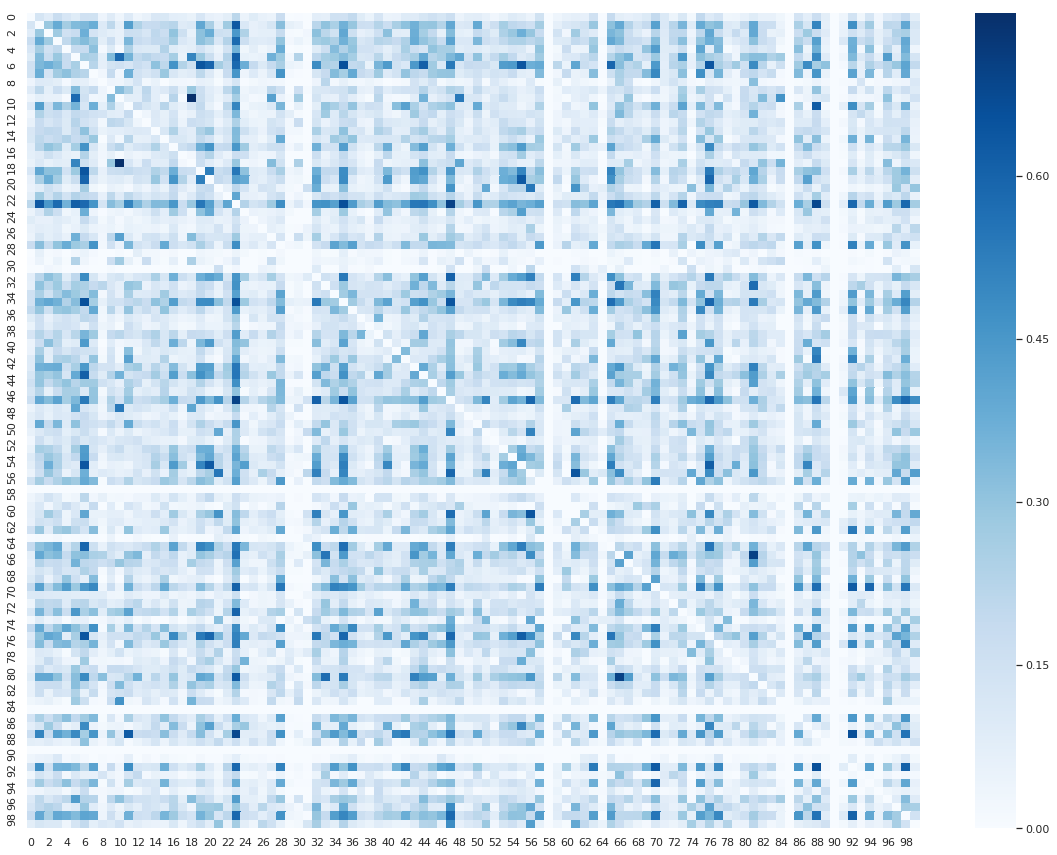

In [253]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,15))
uniform_data = similarity_matrix
ax = sns.heatmap(uniform_data,cmap="Blues")
plt.show()

## Displaying Github Users with the Highest Cosine Similarity - Most Recommended for Collaboration

In [259]:
print("Top pairs of github users who should collaborate together are: ",'\n')
for i in range(len(users)):
    for j in range(i+1,len(users)):
        if similarity_matrix[i][j]>0.6:
            print('({0},{1})'.format(users[i],users[j]))

Top pairs of github users who should collaborate together are:  

(Alexoner,Solertis)
(Eagles2F,Solertis)
(EugeneLiang,Rebaiahmed)
(EugeneLiang,amitagrawal)
(EugeneLiang,barbietunnie)
(EugeneLiang,brycepj)
(EugeneLiang,daevid)
(JGeovani,PittyXu)
(JimberXin,elviswf)
(SamLebarbare,brycepj)
(Solertis,amitagrawal)
(Solertis,bertomartin)
(Solertis,cheekybastard)
(Solertis,digvan)
(Solertis,elviswf)
(adivik2000,bertomartin)
(amitagrawal,bertomartin)
(brycepj,daevid)
(buffpojken,cameronpriest)
(cdesch,digvan)
(cheekybastard,eyadsibai)
(elviswf,eyadsibai)
(eyadsibai,geojackass)
